__ОБНАРУЖЕНИЕ ПРИСУТСТВИЯ ЛЮДЕЙ В ПОМЕЩЕНИИ__

Преподготовка данных

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
import sys

train='C:/Users/kotsi/Downloads/train.csv'
data_train = pd.read_csv(train, delimiter=",", index_col='id')
data_train=data_train.drop(['date'], axis='columns')
#data_train.shape - (12336,6)
#data_train.describe()

#data_train.corr()
data_train=data_train[['Occupancy','Light','CO2','Temperature']]

#нормализация не принесла никаких результатов
#data_train

Обучение модели из sklearn

In [3]:
X=data_train.drop(['Occupancy'], axis='columns')
y=data_train['Occupancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
lr=LogisticRegression() 
lr.fit(X_train, y_train)
prediction1=lr.predict(X_test)
accuracy_score(prediction1, y_test)#0.9943273905996759 было лучшим результатом здесь,
#однако в другой метрике проигрывало

0.9878444084278768

In [4]:
test='C:/Users/kotsi/Downloads/test.csv'
data_test = pd.read_csv(test, delimiter=",", index_col='id')
data_test1=data_test[['Light','CO2','Temperature']]
prediction2=lr.predict(data_test1)
data_test1['value']=prediction2
ans=pd.concat([data_test, data_test1['value']], axis=1)
ans.to_csv('solution.csv')
ans

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\tensorflow35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,date,Temperature,Humidity,Light,CO2,HumidityRatio,value
id,,,,,,,
0,12.02.2015,22.315000,26.550000,461.500000,548.000000,0.004425,1
1,12.02.2015,22.290000,26.550000,454.000000,546.250000,0.004418,1
2,12.02.2015,22.323333,26.600000,454.000000,542.666667,0.004436,1
3,12.02.2015,22.290000,26.600000,454.000000,543.333333,0.004427,1
4,12.02.2015,22.315000,26.600000,450.250000,551.750000,0.004433,1
5,12.02.2015,22.290000,26.650000,439.000000,555.000000,0.004435,1
6,12.02.2015,22.290000,26.650000,439.000000,552.750000,0.004435,1
7,12.02.2015,22.290000,26.745000,439.000000,555.000000,0.004451,1
8,12.02.2015,22.290000,26.790000,439.000000,554.000000,0.004458,1


Логистическая регрессия ручками в векторном виде

In [5]:
import math
#y|=[12336,]
#X=[12336,2]
#X*w=[12336,1]

def sigmoid(x): #x-функция 
    sig=1/(1+np.exp(-x))
    return sig

class MyLogisticRegression:
    def __init__(self, steps, alpha):
        self.steps = steps
        self.alpha = alpha
        
    def fit(self, X, y):
        intercept = np.ones((X.shape[0], 1)) #[11102,1] - [столбцы,строки]
        X = np.hstack((intercept, X))#[11102,3]

        self.weights = np.random.uniform(-30000,10000,X.shape[1]) #[3,]
        print(self.weights)

        for step in range(self.steps):
            scores = np.dot(X, self.weights)#[11102,]
            predictions = sigmoid(scores)
            error = y - predictions #арги:[11102,]{0,1};
                                    #вектор ошибок: {-1,0,1}, где {-1,1} - ошибки
                
            gradient = np.dot(X.T, error)
            
            self.weights += self.alpha * gradient
            
        print(self.weights)
    
    def predict_binary(self, X):
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
            
        res =  np.sign(np.dot(X, self.weights)) #-1 если a < 0, 0 если a == 0, 1 если a <> 0   
        np.place(res, res < 0, 0)
        return res

In [6]:
my_lr = MyLogisticRegression(40000, 0.005) #создаем экземляр класса
my_lr.fit(X_train, y_train)#над ним изуверствуем
my_predict = my_lr.predict_binary(X_test)

accuracy_score(y_test, my_predict)

[-13488.09730533 -25585.83432325 -25503.27006163   8161.79499809]
[ -21547.56279384    8954.96535703    2702.6766152  -174243.01116269]


0.9619124797406807

In [7]:
data_test2=data_test[['Light','CO2','Temperature']]
my_predict2 = my_lr.predict_binary(data_test2)
data_test2['value']=my_predict2
ans1=pd.concat([data_test, data_test2['value']], axis=1)
ans1.to_csv('solution1.csv')
ans1

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\tensorflow35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,Temperature,Humidity,Light,CO2,HumidityRatio,value
id,,,,,,,
0,12.02.2015,22.315000,26.550000,461.500000,548.000000,0.004425,1.0
1,12.02.2015,22.290000,26.550000,454.000000,546.250000,0.004418,1.0
2,12.02.2015,22.323333,26.600000,454.000000,542.666667,0.004436,1.0
3,12.02.2015,22.290000,26.600000,454.000000,543.333333,0.004427,1.0
4,12.02.2015,22.315000,26.600000,450.250000,551.750000,0.004433,1.0
5,12.02.2015,22.290000,26.650000,439.000000,555.000000,0.004435,1.0
6,12.02.2015,22.290000,26.650000,439.000000,552.750000,0.004435,1.0
7,12.02.2015,22.290000,26.745000,439.000000,555.000000,0.004451,1.0
8,12.02.2015,22.290000,26.790000,439.000000,554.000000,0.004458,1.0


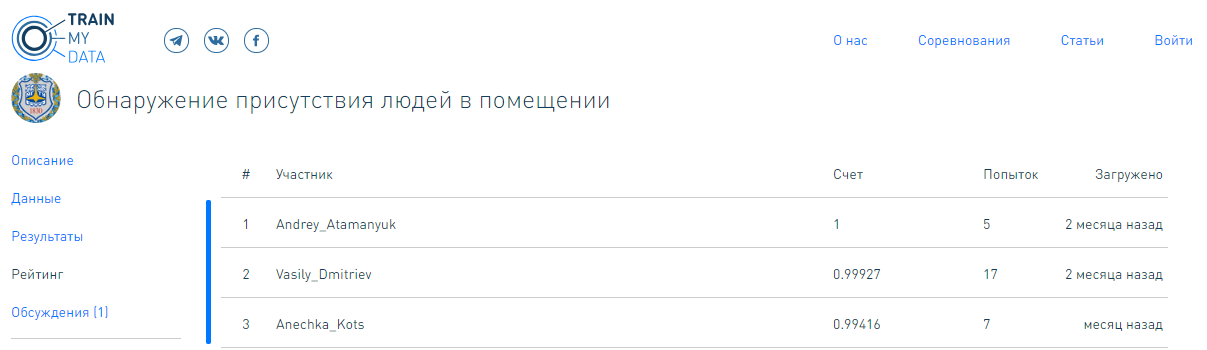

In [8]:
from IPython.display import Image
Image("C:/Users/kotsi/OneDrive/Изображения/Снимки экрана/Живём.png")